In [152]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import time
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import matplotlib as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_validate,cross_val_score, train_test_split, KFold, GridSearchCV)
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import metrics
from IPython import display
from mpl_toolkits.mplot3d import Axes3D


sns.set(style="ticks", color_codes=True)

In [153]:
#split dataset as 80/20
#perform Linear Regression


def split_and_validate(X, y):

    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

#Plotting 
def plot_approximation(est, ax, label=None):

    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)
    
#prob plot of sample 

    
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)

    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    

In [161]:
df1= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf.csv")
df2= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf2.csv")
df3= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf3.csv")
df4= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf4.csv")
df5= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf5.csv")
df6= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf6.csv")
df7= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf7.csv")
df8= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf8.csv")
df9= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf9.csv")
df10= pd.read_csv(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\movdf10.csv")
frames = [df1, df2, df3, df4, df5, df6,df7,df8,df9,df10]

df = pd.concat(frames)
df.columns = ['number', 'budget', 'dom_gross', 'tot_gross', 'director', 'actor', 'release', 'genre', 'mpaa']

In [162]:
df.head()

,number,budget,dom_gross,tot_gross,director,actor,release,genre,mpaa
0,1,400000000,858373000,2797800564,Joe-Russo,Robert-Downey-Jr,2019/04/23,Adventure,PG-13
1,2,379000000,241063875,1045663875,Rob-Marshall,Johnny-Depp,2011/05/20,Adventure,PG-13
2,3,365000000,459005868,1396099202,Joss-Whedon,James-Spader,2015/04/22,Adventure,PG-13
3,4,306000000,936662225,2065478084,J-J-Abrams,Adam-Driver,2015/12/16,Adventure,PG-13
4,5,300000000,678815482,2044540523,Joe-Russo,Robert-Downey-Jr,2018/04/25,Adventure,PG-13


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 99
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   number     1000 non-null   int64 
 1   budget     1000 non-null   int64 
 2   dom_gross  1000 non-null   int64 
 3   tot_gross  1000 non-null   int64 
 4   director   1000 non-null   object
 5   actor      1000 non-null   object
 6   release    997 non-null    object
 7   genre      1000 non-null   object
 8   mpaa       1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [9]:
df.to_csv(r'C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\dff.csv', index= False)

In [164]:
act_df= pd.read_excel(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\dff_act.xlsx", header=None)
act_df.columns = ['actor','tot_gross', 'act_avg_gross']

dir_df= pd.read_excel(r"C:\Users\TCIDEMIRKAN\Desktop\DS BootCamp\DSBootCampNov\curriculum\project-02\project-02-introduction\CSV\dff_dir.xlsx", header=None)
dir_df.columns = ['director', 'tot_gross', 'dir_avg_gross']

In [165]:
act_df = act_df.drop(act_df.index[0])

In [166]:
act_df = act_df.reset_index(drop=True)

In [167]:
act_df.head()

,actor,tot_gross,act_avg_gross
0,Aaron-Eckhart,288039266,7.20098e+07
1,Aaron-Kwok,194058503,194058503
2,Aaron-Paul,194169619,194169619
3,Aaron-Taylor-Johnson,529076069,529076069
4,Adam-Driver,2065478084,2065478084


In [168]:
act_df['tot_gross']=pd.to_numeric(act_df['tot_gross'])

In [104]:
act_df['act_avg_gross']=pd.to_numeric(act_df['act_avg_gross'])

In [169]:
act_df['act_avg_gross']=act_df['act_avg_gross'].astype(int)

In [170]:
act_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   actor          290 non-null    object
 1   tot_gross      290 non-null    int64 
 2   act_avg_gross  290 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.8+ KB


In [171]:
dir_df = dir_df.drop(dir_df.index[0])

In [172]:
dir_df = dir_df.reset_index(drop=True)

In [173]:
dir_df['tot_gross']=pd.to_numeric(dir_df['tot_gross'])
dir_df['dir_avg_gross']=pd.to_numeric(dir_df['dir_avg_gross'])

In [174]:
dir_df['dir_avg_gross']=dir_df['dir_avg_gross'].astype(int)

In [175]:
dir_df.head()

,director,tot_gross,dir_avg_gross
0,Adam-McKay,241830252,60457563
1,Adam-Shankman,282500867,70625216
2,Adil-El-Arbi,424291710,424291710
3,Akiva-Goldsman,29575033,29575033
4,Alan-Taylor,1076753410,269188352


In [176]:
dir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   director       351 non-null    object
 1   tot_gross      351 non-null    int64 
 2   dir_avg_gross  351 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 7.0+ KB


In [177]:
#cleaning values to have only alphanumeric chars
df['actor'] = df['actor'].str.replace(',','').str.lower()
df['actor'] = df['actor'].str.replace('-','')
df['actor'] = df['actor'].str.replace('.','')
df['actor'] = df['actor'].str.replace(' ','')
df['director'] = df['director'].str.replace(',','').str.lower()
df['director'] = df['director'].str.replace('-','')
df['director'] = df['director'].str.replace('.','')
df['director'] = df['director'].str.replace(' ','')
act_df['actor'] = act_df['actor'].str.replace(',','').str.lower()
act_df['actor'] = act_df['actor'].str.replace('-','')
act_df['actor'] = act_df['actor'].str.replace('.','')
act_df['actor'] = act_df['actor'].str.replace(' ','')
dir_df['director'] = dir_df['director'].str.replace(',','').str.lower()
dir_df['director'] = dir_df['director'].str.replace('-','')
dir_df['director'] = dir_df['director'].str.replace('.','')
dir_df['director'] = dir_df['director'].str.replace(' ','')


#reset_index()

df = df.reset_index(drop=True)
act_df = act_df.reset_index(drop=True)
dir_df = dir_df.reset_index(drop=True)

In [178]:
act_df= act_df[['actor', 'act_avg_gross']]
dir_df= dir_df[['director', 'dir_avg_gross']]

df=df.merge(dir_df, on = 'director', how = 'left')
df=df.merge(act_df, on = 'actor', how = 'left')

In [179]:
df.head()

,number,budget,dom_gross,tot_gross,director,actor,release,genre,mpaa,dir_avg_gross,act_avg_gross
0,1,400000000,858373000,2797800564,joerusso,robertdowneyjr,2019/04/23,Adventure,PG-13,1210585272,108161478
1,2,379000000,241063875,1045663875,robmarshall,johnnydepp,2011/05/20,Adventure,PG-13,100821955,26575160
2,3,365000000,459005868,1396099202,josswhedon,jamesspader,2015/04/22,Adventure,PG-13,727799853,352728924
3,4,306000000,936662225,2065478084,jjabrams,adamdriver,2015/12/16,Adventure,PG-13,175681250,2065478084
4,5,300000000,678815482,2044540523,joerusso,robertdowneyjr,2018/04/25,Adventure,PG-13,1210585272,108161478


In [180]:
df= df.fillna(0)
df = df[df.dom_gross != 0] 
df = df[df.tot_gross != 0] 
df = df[df.dir_avg_gross != 0]
df = df[df.act_avg_gross != 0]
print(df.shape)
df

(983, 11)


,number,budget,dom_gross,tot_gross,director,actor,release,genre,mpaa,dir_avg_gross,act_avg_gross
0,1,400000000,858373000,2797800564,joerusso,robertdowneyjr,2019/04/23,Adventure,PG-13,1210585272,108161478
1,2,379000000,241063875,1045663875,robmarshall,johnnydepp,2011/05/20,Adventure,PG-13,100821955,26575160
2,3,365000000,459005868,1396099202,josswhedon,jamesspader,2015/04/22,Adventure,PG-13,727799853,352728924
3,4,306000000,936662225,2065478084,jjabrams,adamdriver,2015/12/16,Adventure,PG-13,175681250,2065478084
4,5,300000000,678815482,2044540523,joerusso,robertdowneyjr,2018/04/25,Adventure,PG-13,1210585272,108161478
...,...,...,...,...,...,...,...,...,...,...,...
995,996,59000000,16790790,28296983,joecornish,louisashbourneserkis,2019/01/18,Action,R,28296983,28296983
996,997,58000000,363070709,784682527,timmiller,ryanreynolds,2016/02/09,Action,R,258763723,100397515
997,998,58000000,350126372,547326372,clinteastwood,bradleycooper,2014/12/25,Action,R,101151659,166198972
998,999,58000000,80069458,158893300,robletterman,jackblack,2015/10/14,Action,R,91450431,88353202


In [ ]:
##One-hot encoding

In [181]:
test_df = df
test_df['pg'] = df.apply(lambda x: x.mpaa=="PG", axis = 1).astype(int)
test_df['pg13'] = df.apply(lambda x: x.mpaa=="PG-13", axis = 1).astype(int)
test_df['r'] = df.apply(lambda x: x.mpaa=="R", axis = 1).astype(int)
test_df['g'] = df.apply(lambda x: x.mpaa=="G", axis = 1).astype(int)
test_df = test_df.drop(['number', 'dom_gross', 'genre','actor', 'director', 'mpaa', 'release'], axis=1) 
lst1=set(df.genre.tolist())
for a in lst1:
    test_df[a] = df.apply(lambda x: x.genre==a, axis = 1).astype(int)

In [182]:
test_df.shape
lst2=list(test_df.columns.values)
test_df.dtypes

budget           int64
tot_gross        int64
dir_avg_gross    int32
act_avg_gross    int32
pg               int32
pg13             int32
r                int32
g                int32
Horror           int32
Adventure        int32
Drama            int32
Action           int32
dtype: object

In [194]:
lst2

['budget',
 'tot_gross',
 'dir_avg_gross',
 'act_avg_gross',
 'pg',
 'pg13',
 'r',
 'g',
 'Horror',
 'Adventure',
 'Drama',
 'Action']

In [192]:
test_df.head()

,budget,tot_gross,dir_avg_gross,act_avg_gross,pg,pg13,r,g,Horror,Adventure,Drama,Action
0,400000000,2797800564,1210585272,108161478,0,1,0,0,0,1,0,0
1,379000000,1045663875,100821955,26575160,0,1,0,0,0,1,0,0
2,365000000,1396099202,727799853,352728924,0,1,0,0,0,1,0,0
3,306000000,2065478084,175681250,2065478084,0,1,0,0,0,1,0,0
4,300000000,2044540523,1210585272,108161478,0,1,0,0,0,1,0,0


In [ ]:
##Exploring possible correlations

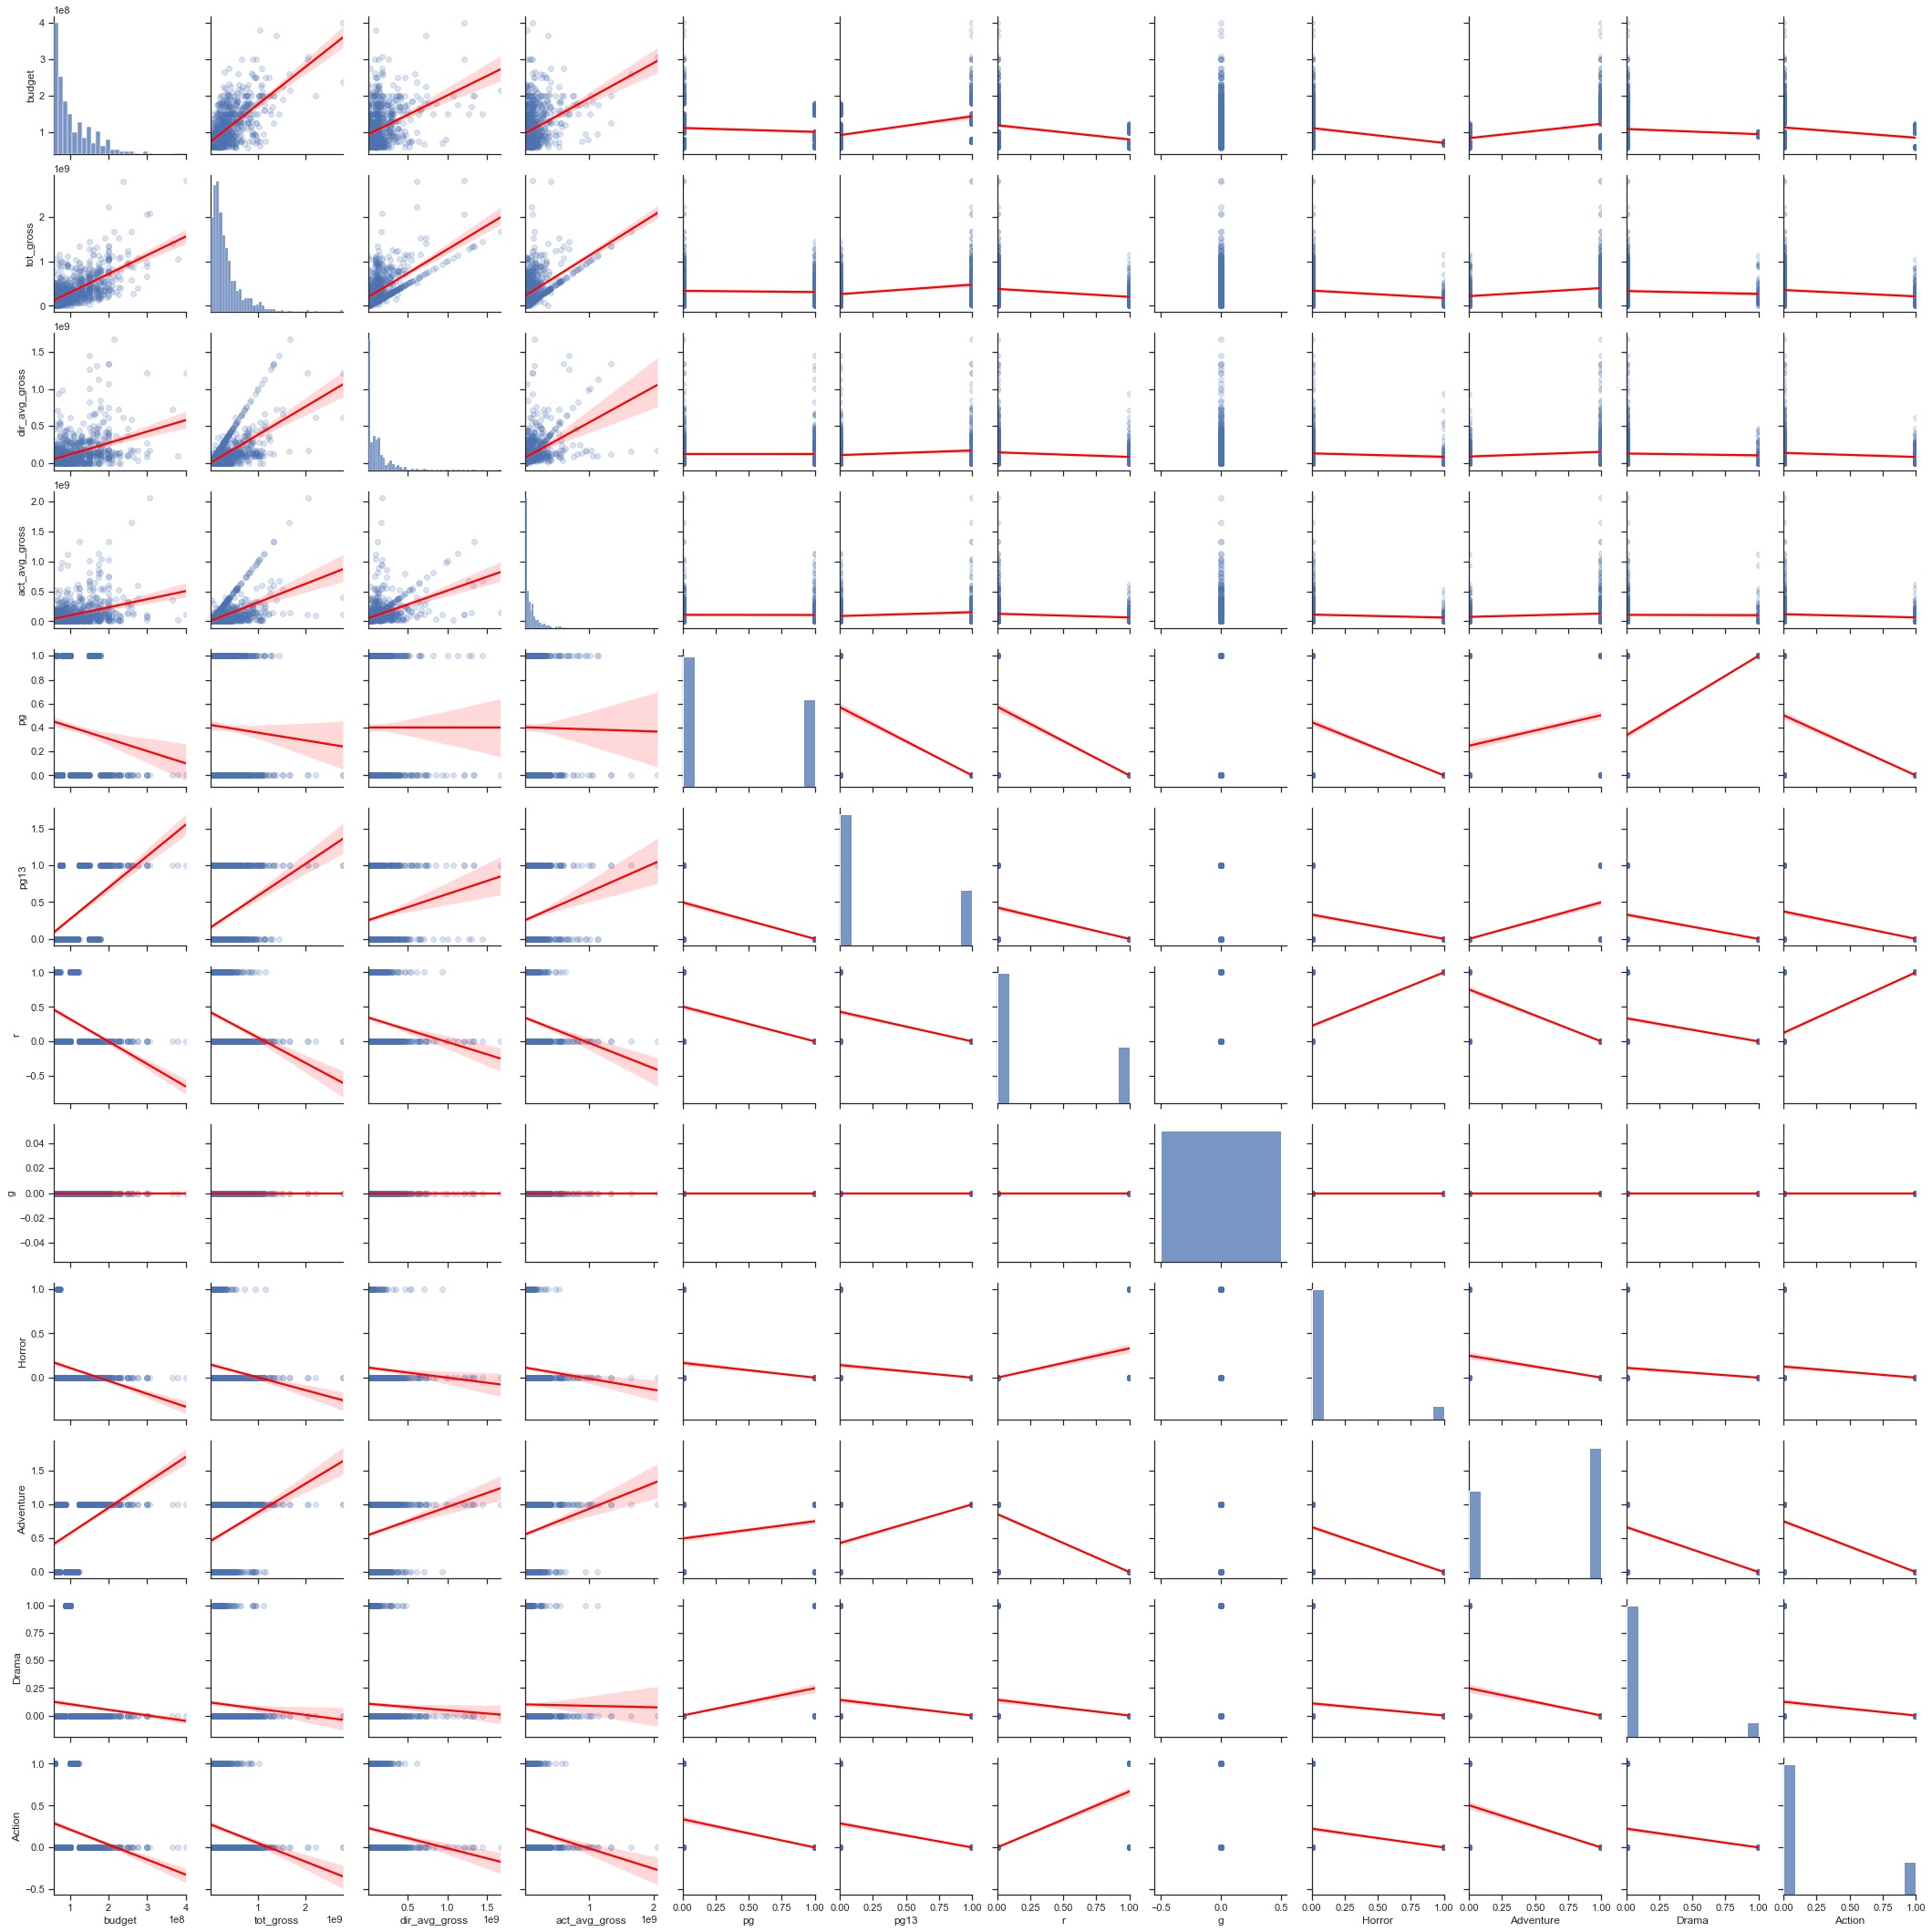

In [183]:
sns.pairplot(test_df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})

In [ ]:
##Various models for feature correlation

In [193]:
test_df1 = df
X1, y1 = test_df1[['budget', 'dir_avg_gross', 'act_avg_gross']], test_df1['tot_gross']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1)

split_and_validate(X1_train, y1_train)


Validation R^2 score was: 0.7381954888716646
Feature coefficient results: 

budget : 2.99
dir_avg_gross : 0.62
act_avg_gross : 0.31


In [184]:
# Spliting data into test, training and validation

X, y = test_df[['budget', 'dir_avg_gross', 'act_avg_gross', 'pg', 'pg13', 'r', 'g']], test_df['tot_gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

split_and_validate(X_train, y_train)


Validation R^2 score was: 0.7360554358502487
Feature coefficient results: 

budget : 2.91
dir_avg_gross : 0.62
act_avg_gross : 0.31
pg : -3653067.47
pg13 : 10000654.59
r : -6347587.12
g : 0.00


In [185]:
#polynomial regression
m = LassoCV()
p = PolynomialFeatures(degree=2)
m.fit(p.fit_transform(X_train),y_train)
m.score(p.transform(X_train),y_train)

C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6377822676271252

C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


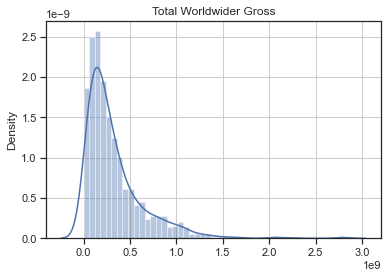

<Figure size 432x288 with 0 Axes>

In [186]:
import matplotlib.pyplot as plt
x=test_df.tot_gross.to_numpy()



#n, bins, patches = plt.hist(x, 50, density=True, facecolor='b', alpha=0.75)
sns.distplot(x)
plt.grid(True)
plt.title('Total Worldwider Gross')
plt.show()
plt.savefig("hist.png")

In [187]:
m.score(p.transform(X_test),y_test)

0.4814481855753333

In [188]:
#linear regression
m = LinearRegression()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.6307034993515326

In [189]:

corr = pd.DataFrame()
for b in list(test_df.columns.values):
    corr.loc['tot_gross', b] = test_df.corr().loc['tot_gross', b]
    
corr

,budget,tot_gross,dir_avg_gross,act_avg_gross,pg,pg13,r,g,Horror,Adventure,Drama,Action
tot_gross,0.654291,1.0,0.636958,0.525988,-0.042162,0.302105,-0.255644,NaN,-0.154038,0.276157,-0.060093,-0.17729


In [190]:
##Visualizing feaure correlation

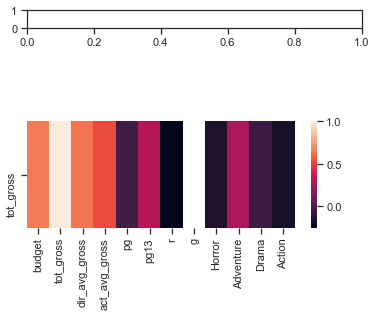

In [191]:
grid_kws = {"height_ratios": (.05, .3), "hspace": 1.5}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)

ax = sns.heatmap(corr)

In [128]:
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
results.summary()

C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tot_gross   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     322.2
Date:                Fri, 15 Jan 2021   Prob (F-statistic):          8.55e-204
Time:                        17:27:56   Log-Likelihood:                -20171.
No. Observations:                 983   AIC:                         4.035e+04
Df Residuals:                     977   BIC:                         4.038e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.827e+07   1.28e+07     -4.548      0.000   -8.34e+07   -3.31e+07
budget            2.7051      0.159     16.961      0.000       2.392       3.018
dir_avg_gross     0.6210      0.039     15.881      0.000       0.544       0.698
act_avg_gross     0.3352      0.039      8.629      0.000       0.259       0.411
pg              -1.8e+07   8.99e+06     -2.003      0.045   -3.56e+07   -3.63e+05
pg13          -1.053e+07   1.32e+07     -0.800      0.424   -3.64e+07    1.53e+07
r             -2.973e+07   9.44e+06     -3.149      0.002   -4.83e+07   -1.12e+07
g                      0          0        nan        nan           0           0
==============================================================================
Omnibus:                      430.983   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3849.749
Skew:                           1.776   Prob(JB):                         0.00
Kurtosis:                      12.021   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0, 0.5, 'Residual')

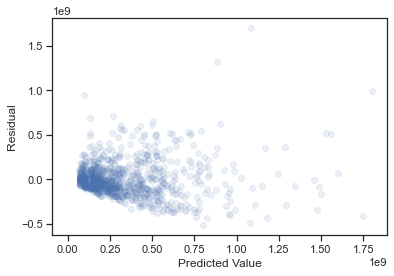

In [129]:
y_pred = results.predict(sm.add_constant(X))

plt.scatter(y_pred,y-y_pred,alpha=.1)
plt.plot(np.linspace(0,600000,1000),np.linspace(0,0,1000))
plt.xlabel('Predicted Value')
plt.ylabel('Residual')

In [ ]:
## LINEAR REGRESSION

In [130]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=5) 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=6)
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [131]:
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_val,y_val)

0.5890471390815168

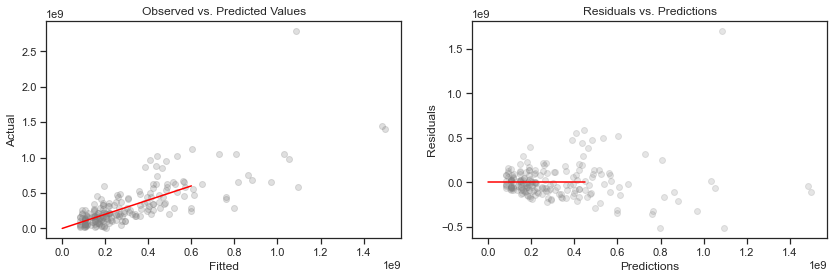

In [132]:
plt.figure(figsize=(14,4))

# Plotting predicted vs. observed
y_pred = lm.predict(X_val)
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y_val, alpha=0.25, color='gray')
plt.plot([0, 600000000], [0, 600000000], color='red')
plt.xlabel('Fitted')
plt.ylabel('Actual')
plt.title("Observed vs. Predicted Values")
plt.savefig("actual_vs_observed.png")

# Residuals
lm_residuals = y_val - y_pred
plt.subplot(1, 2, 2)
plt.scatter(y_pred, lm_residuals, alpha=.2, color='gray')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.plot([0,450000000], [0, 0], color='red')
plt.title("Residuals vs. Predictions")
plt.savefig("residuals.png");

In [133]:
X_columns='budget', 'dir_avg_gross', 'act_avg_gross', 'pg', 'pg13', 'r', 'g'
list(zip(X_columns,lm.coef_))

[('budget', 2.6879780078202726),
 ('dir_avg_gross', 0.688466924078644),
 ('act_avg_gross', 0.2251747613782495),
 ('pg', 2317315.2558408314),
 ('pg13', 8307541.4805681445),
 ('r', -10624856.73640898),
 ('g', 0.0)]

In [135]:
def RMSE(actuals, preds): #RMSE
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_test,y_pred)

400863276.0505506

In [136]:
# Using Ridge regularization and cross validation
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)

In [137]:
# Using Lasso regularization
lm_lasso = Lasso()

In [138]:
# Trying polynomial features for the datasets

poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

In [139]:
lm.fit(X_train, y_train)
print('Linear Regression val R^2: %.3f', lm.score(X_val, y_val))

lm_reg.fit(X_train_scaled, y_train)
print('Ridge Regression val R^2: %.3f', lm_reg.score(X_val_scaled, y_val))

lm_lasso.fit(X_train_scaled, y_train)
print('Lasso Regression val R^2: %.3f', lm_lasso.score(X_val_scaled, y_val))

lm_poly.fit(X_train_poly, y_train)
print('Degree 2 polynomial regression val R^2: %.3f', lm_poly.score(X_val_poly, y_val))

Linear Regression val R^2: %.3f 0.5890471390815168
Ridge Regression val R^2: %.3f 0.5890762499890465
Lasso Regression val R^2: %.3f 0.5890471389610479
Degree 2 polynomial regression val R^2: %.3f 0.5439108095078126


In [140]:
list(zip(X_columns,lm_reg.coef_))

[('budget', 136329084.27112496),
 ('dir_avg_gross', 128289332.070914),
 ('act_avg_gross', 39954270.40377876),
 ('pg', 1005361.2519746798),
 ('pg13', 3856522.4223402594),
 ('r', -5007796.840088445),
 ('g', 0.0)]

In [142]:
RMSE(lm_reg.predict(X_val_scaled),y_val)

207068606.9793373

In [ ]:
##CROSS VALIDATION TEST

In [200]:
X, y = test_df[['budget', 'dir_avg_gross', 'act_avg_gross', 'pg', 'pg13', 'r', 'g']], test_df['tot_gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7) 

X, y = np.array(X), np.array(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_cv = LinearRegression()
lm_reg_cv = Ridge(alpha=1)
lm_lasso_cv = Lasso()
kf = KFold(n_splits=5, shuffle=True, random_state = 71)


print(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2')))

print(cross_val_score(lm_reg_cv, X, y, cv=kf, scoring='r2'))
print(np.mean(cross_val_score(lm_reg_cv, X, y, cv=kf, scoring='r2')))

print(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2'))
print(np.mean(cross_val_score(lm_lasso_cv, X, y,
                                cv=kf,       
                                scoring='r2')))

[0.69696112 0.48508277 0.59986891 0.61525708 0.6342986 ]
0.6062936969429863
[0.69700615 0.48508848 0.59985762 0.6152613  0.63432183]
0.6063070752253503
[0.69696112 0.48508277 0.59986891 0.61525708 0.6342986 ]
0.6062936971447799


C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.5066e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.53008e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.48081e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.66901e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\TCIDEMIRKAN\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-condit

In [145]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=1800, max_features=3)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)
RMSE(rf.predict(X_val),y_val)

206398292.631346

In [146]:
gbm = GradientBoostingRegressor(n_estimators=1600, max_depth=3, learning_rate=.01)
gbm.fit(X_train, y_train)
gbm.score(X_val, y_val)

0.5512365476267382